In [157]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
import statsmodels.api as sm

import itertools
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from sklearn.metrics import mean_squared_error
from math import sqrt

In [158]:
data = pd.read_csv('D:/WORK/Gold_data_Ychart/ychart_gold_final.csv',parse_dates=['date'],dayfirst=True)
print (data.head())
print ('\n Data Types:')
print (data.dtypes)
print(data.isnull().sum())

  month_name  month  day  year       date     price
0        Feb      2    1  2019 2019-02-01  94006.81
1        Jan      1   31  2019 2019-01-31  94109.53
2        Jan      1   30  2019 2019-01-30  93262.85
3        Jan      1   29  2019 2019-01-29  92979.85
4        Jan      1   28  2019 2019-01-28  92636.23

 Data Types:
month_name            object
month                  int64
day                    int64
year                   int64
date          datetime64[ns]
price                float64
dtype: object
month_name    0
month         0
day           0
year          0
date          0
price         0
dtype: int64


In [159]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
# data data = pd.read_csv('D:/WORK/Gold_data_Ychart/ychart_gold_final.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)
# data.head()

cols = ['month_name','month','day','year']
data.drop(cols, axis=1, inplace=True)

# data = data.sort_values('date')

data.set_index('date',inplace=True)

In [160]:
# data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
data.head()
# len(data)

,price
date,
2019-02-01,94006.81
2019-01-31,94109.53
2019-01-30,93262.85
2019-01-29,92979.85
2019-01-28,92636.23


In [161]:
# ts = pd.DataFrame()
tsd = data['price'].resample('MS').mean()

# data.groupby(data['date'].dt.)['price'].mean()



tsd.drop(tsd.tail(1).index,inplace=True)
tsd.tail()

date
2018-09-01    86545.169500
2018-10-01    89455.151304
2018-11-01    87224.356471
2018-12-01    88455.671429
2019-01-01    91350.170435
Freq: MS, Name: price, dtype: float64

In [162]:
# crosscheck
data['2018-12'].mean()
# 87905.215652

price    88455.671429
dtype: float64

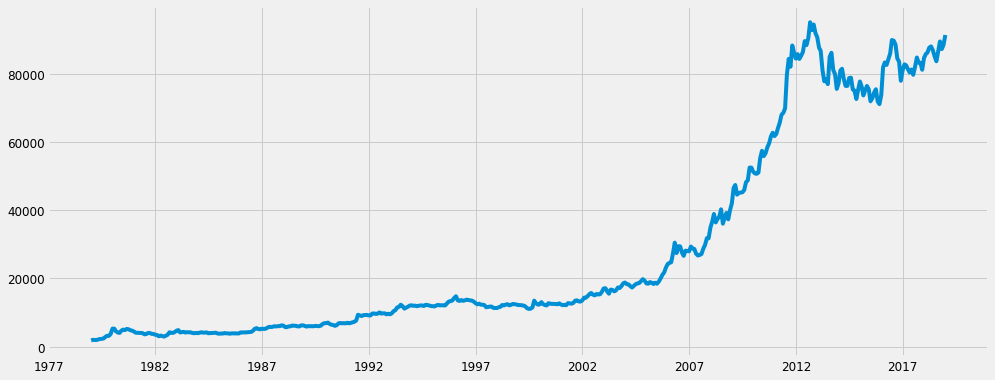

In [163]:
plt.plot(tsd)

In [164]:
tsd.isnull().sum()
# type(ts)

0

In [165]:
tsd.tail(20)
len(tsd)

481

In [166]:
ts = tsd[:'2018-05'].copy()
ts_v = tsd['2018-05':].copy()

In [167]:
ts_v.tail(9)

date
2018-05-01    88005.930435
2018-06-01    86888.122381
2018-07-01    85122.920909
2018-08-01    83648.947826
2018-09-01    86545.169500
2018-10-01    89455.151304
2018-11-01    87224.356471
2018-12-01    88455.671429
2019-01-01    91350.170435
Freq: MS, Name: price, dtype: float64

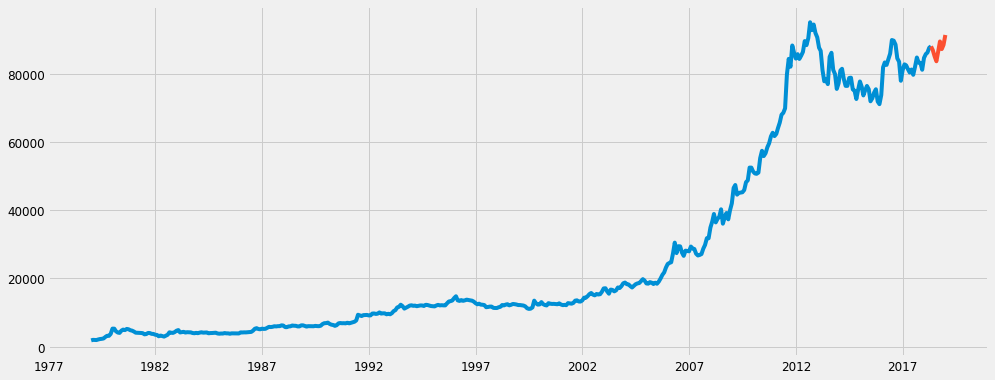

In [168]:
# ts = np.log(ts)
# ts = ts - ts.shift(1)
# ts = ts.dropna()
plt.plot(ts,label="Train")
plt.plot(ts_v ,label="Test")
# expwighted_avg = ts.ewm(halflife=12).mean()
# plt.plot(ts)
# plt.plot(expwighted_avg, color='red')

In [169]:
# ts = ts - expwighted_avg
# test_stationarity(ts)
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

In [170]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
#     print("dftest:\n",dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [171]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [172]:
adf_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.686040
p-value                          0.989555
#Lags Used                      12.000000
Number of Observations Used    460.000000
Critical Value (1%)             -3.444646
Critical Value (5%)             -2.867844
Critical Value (10%)            -2.570128
dtype: float64


In [173]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [174]:
kpss_test(ts)

Results of KPSS Test:
Test Statistic            2.019086
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


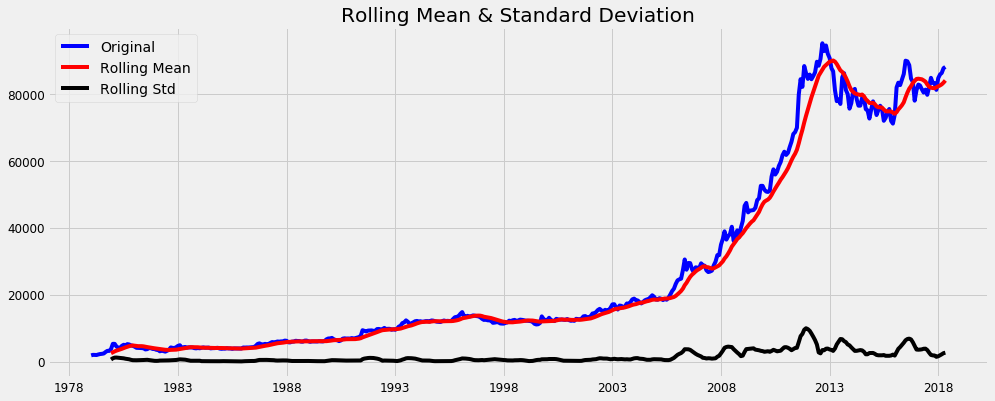

Results of Dickey-Fuller Test:
Test Statistic                   0.686040
p-value                          0.989555
#Lags Used                      12.000000
Number of Observations Used    460.000000
Critical Value (1%)             -3.444646
Critical Value (5%)             -2.867844
Critical Value (10%)            -2.570128
dtype: float64


In [175]:
test_stationarity(ts)

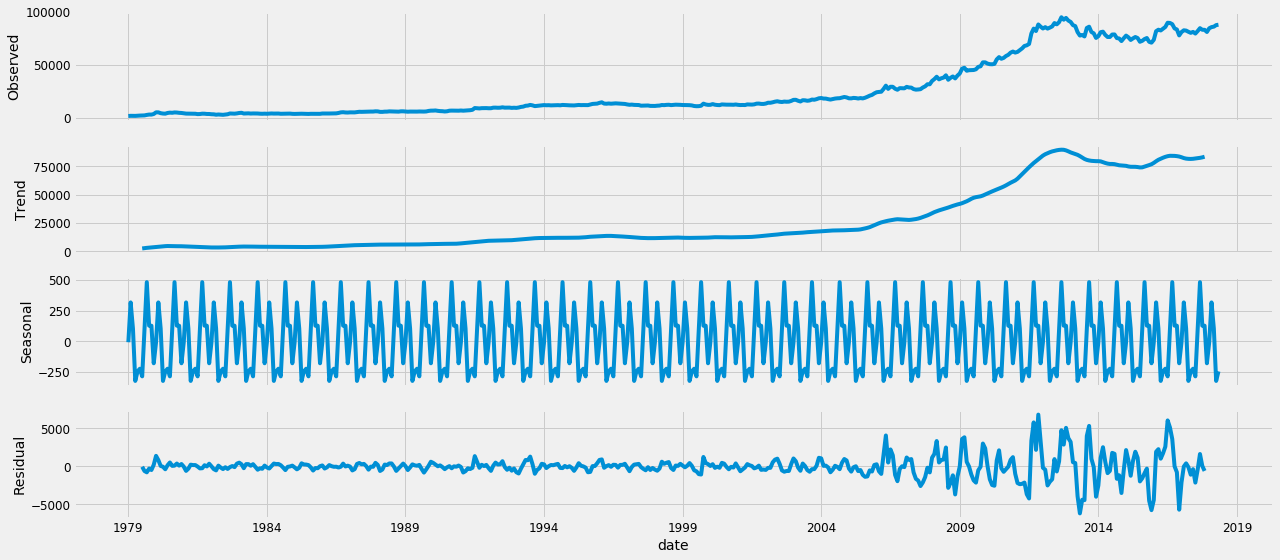

In [176]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()

plt.show()

In [177]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

bestAIC = np.inf
bestParam = None
bestSParam = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic<bestAIC:
                bestAIC = results.aic
                bestParam = param
                bestSParam = param_seasonal
        except:
            continue
print('the best ones are:',bestAIC,bestParam,bestSParam)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11322.292591373694
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10744.185907211562
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9288.41597851637
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9015.381234089211
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9251.831518762676
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9213.684786756075
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9014.815917024975
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8994.27456644488
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10954.372176222325
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10596.338821472387
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8932.852381305463
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8536.119781185964
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10606.823302534942
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:10562.80895292007
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8567.655469091967
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8524.78502398364
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8185.639335920874
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7981.257954469866
ARIMA(0,

In [178]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 2, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1128      0.030      3.755      0.000       0.054       0.172
ma.L1         -0.9999      0.052    -19.344      0.000      -1.101      -0.899
ma.S.L12      -1.1350      0.023    -49.435      0.000      -1.180      -1.090
sigma2      1.624e+06   3.16e-08   5.15e+13      0.000    1.62e+06    1.62e+06


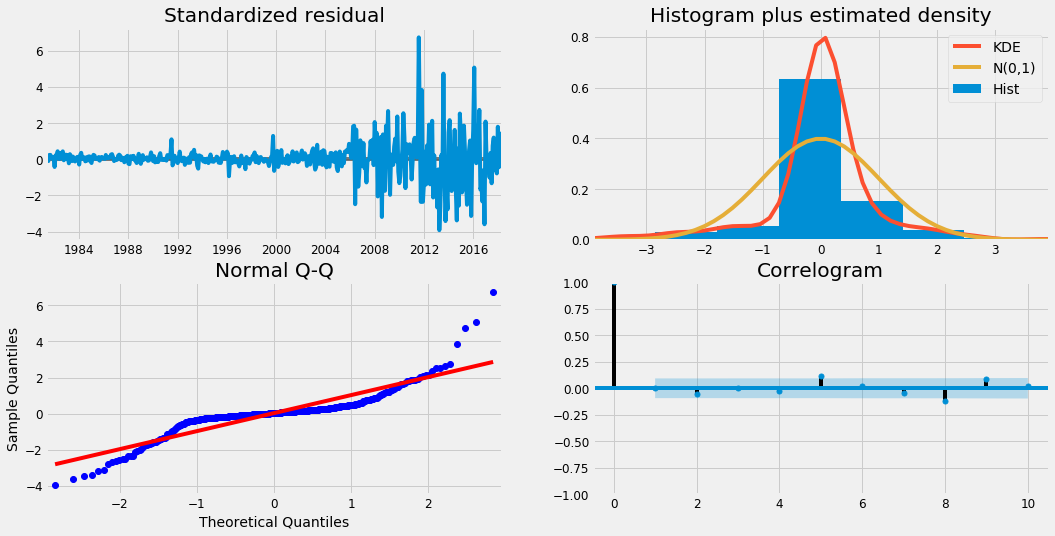

In [179]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

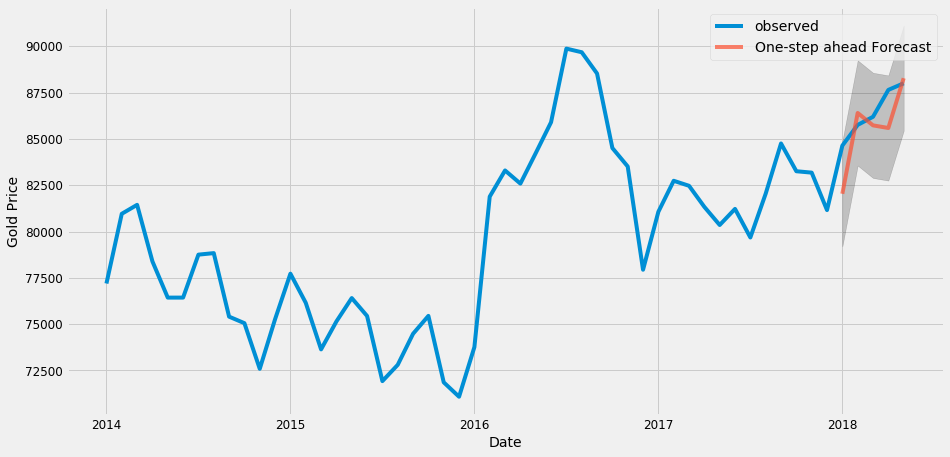

In [180]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Price')
plt.legend()
plt.show()

In [181]:
y_forecasted = pred.predicted_mean
y_truth = ts['2018-01-01':]
# mse = ((y_forecasted - y_truth) ** 2).mean()
mse = mean_squared_error(y_forecasted, y_truth)
rms = sqrt(mean_squared_error(y_forecasted, y_truth))
# 2394143.55

print(rms)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

1529.6049995628916
The Mean Squared Error of our forecasts is 2339691.45


In [182]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1529.6


In [183]:
pred_uc = results.get_forecast(steps=8)
pred_ci = pred_uc.conf_int()

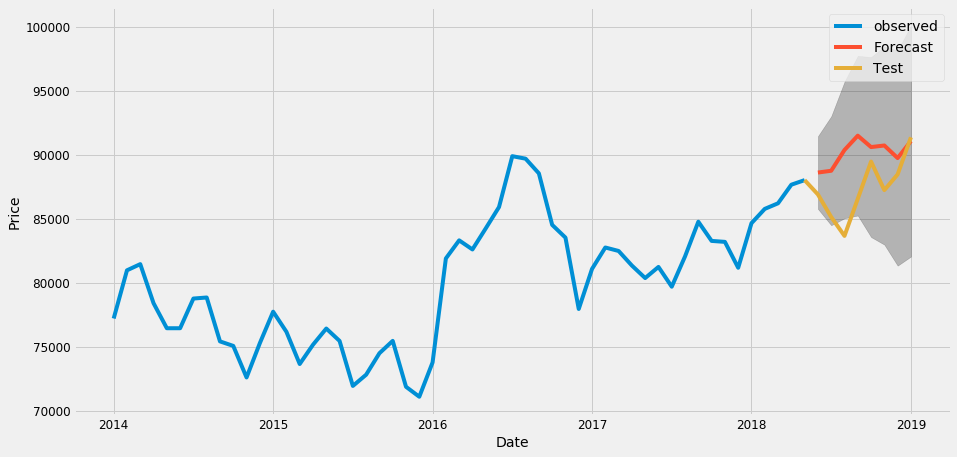

In [184]:
ax = ts['2014-01-01':].plot(label='observed', figsize=(14, 7))
# k = np.exp(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# plt.plot(ts_v, label='Test')
ts_v.plot(ax=ax, label='Test')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend(loc="best")
plt.show()

In [185]:
pred_uc.predicted_mean

2018-06-01    88597.841728
2018-07-01    88737.384024
2018-08-01    90359.495983
2018-09-01    91478.192694
2018-10-01    90588.962822
2018-11-01    90711.169426
2018-12-01    89729.085339
2019-01-01    91057.020859
Freq: MS, dtype: float64

In [186]:
ts_v

date
2018-05-01    88005.930435
2018-06-01    86888.122381
2018-07-01    85122.920909
2018-08-01    83648.947826
2018-09-01    86545.169500
2018-10-01    89455.151304
2018-11-01    87224.356471
2018-12-01    88455.671429
2019-01-01    91350.170435
Freq: MS, Name: price, dtype: float64

In [187]:
pred_ci

,lower price,upper price
2018-06-01,85757.921460,91437.761997
2018-07-01,84481.370429,92993.397618
2018-08-01,85024.603854,95694.388113
2018-09-01,85240.881999,97715.503388
2018-10-01,83559.070909,97618.854736
2018-11-01,82964.914415,98457.424438
2018-12-01,81323.179111,98134.991566
2019-01-01,82035.720265,100078.321453


# Reference
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/